In [1]:
import pandas as pd
import re
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('./webscraper_1996-2014/Marathon_data.csv',encoding='utf8')

In [3]:
data.head(3)

,Age,BIB,City_State,Division,Finish,Half,Name,Place_Division,Place_Gender,Place_Overall,Year
0,NaN,NaN,NaN,25-29,04:56:52,NaN,»,647,2283,8110,1996
1,NaN,5666.0,"USA, IL",25-29,05:37:37,NaN,"» Aaron, Todd (USA)",1144,6290,9003,1996
2,NaN,5354.0,"USA, IL",30-34,05:16:57,NaN,"» Abbinanti, Sal (USA)",1183,6130,8665,1996


# defining functions to clean data

In [4]:
'''
The following piece is only for testing purposes.
It also meant as a demonstration to the process taking place in get_names.
Uncomment to run.

full_name="» Aagaard, Jon Fo Saka Omaha (USA)".split(',')
print(full_name)
first_name = re.sub('[^ A-Za-z0-9]','',full_name[0]).strip()
print(first_name)
rest_names = [re.sub('[^ A-Za-z0-9]','',i.strip()) for i in full_name[1].split('(')]
print(rest_names)

'''

'\nThe following piece is only for testing purposes.\nIt also meant as a demonstration to the process taking place in get_names.\nUncomment to run.\n\nfull_name="» Aagaard, Jon Fo Saka Omaha (USA)".split(\',\')\nprint(full_name)\nfirst_name = re.sub(\'[^ A-Za-z0-9]\',\'\',full_name[0]).strip()\nprint(first_name)\nrest_names = [re.sub(\'[^ A-Za-z0-9]\',\'\',i.strip()) for i in full_name[1].split(\'(\')]\nprint(rest_names)\n\n'

In [5]:
#cleaning the Name column so it can be represented in three columns: First_Name, Last_Name, and Nationality
def get_names(df):
    
    first_name=[]
    last_name=[]
    nationality=[]
    
    for _,row in df.iterrows():  
        full_name = row['Name'].split(',')
        #print (full_name)
        if(len(full_name)== 2):
            l_name = re.sub('[^A-Za-z0-9  ]','',full_name[0]).strip() #strip removes white spaces at the begning and end of a string
            rest_names= [re.sub('[^ A-Za-z0-9]','',n.strip()) for n in full_name[1].split('(')]
            first_name.append(rest_names[0])
            last_name.append(l_name)
            #some rows have only first and last names with no country. In this case, check for upper case words (e.g, USA, TWA, CAND..etc.)
            #if False, then append ''. Note, rest_names[-1] gets the last item in the list rest_names.
            if(rest_names[-1].isupper()):
                nationality.append(rest_names[-1])
            else:
                nationality.append('')
        else:
            last_name.append('')
            first_name.append('')
            nationality.append('')
    return (first_name, last_name,nationality)
# %timeit get_names_1(data) for large datasets iterating over rows is much fast than 

#cleaning City_State column so it can be represented in 2 columns Country and State.
def get_city_state(df):
    country = []
    state = []
    for _, row in df.iterrows():
        try:
            participant_country,participant_state = row['City_State'].split(',')
            country.append(participant_country)
            state.append(participant_state)
        except:
            country.append('')
            state.append('')
    return (country,state)

#converting time from type string to type date and time.
def get_time (t):
    if((t!='') & (t!='DSQ')):
        return (dt.strptime(str(t),'%H:%M:%S').time()) #note: .time() because we are converting to time. switch to .date() if converting to dates
    else:
        return ''

In [6]:
f_name,l_name,nationality = get_names(data)
city, state = get_city_state(data)

#appending new columns to the df
data['First_Name'] = f_name
data['Last_Name'] = l_name
data['City'] = city
data['State'] = state
data['Nationality'] = nationality


In [7]:
# replacing nan values with ''
data[['Finish','Half']] = data[['Finish','Half']].replace(np.nan,'')
# coverting Finish and Half columns to type datetime for better accessability to hours, minutes, and seconds
data['Finish'] = data['Finish'].apply(get_time)
data['Half'] = data['Half'].apply(get_time)
#data[['Finish','Half']] = data[['Finish','Half']].replace('',np.nan)

In [8]:
data.columns

Index(['Age', 'BIB', 'City_State', 'Division', 'Finish', 'Half', 'Name',
       'Place_Division', 'Place_Gender', 'Place_Overall', 'Year', 'First_Name',
       'Last_Name', 'City', 'State', 'Nationality'],
      dtype='object')

# Questions:
- How many people outside the US have pariticipated in Chicago Marathon over the years? which countries participate the most?
- Age range..

### Where do chicago marathon runners come from?

In [9]:
print ('from 1996 to 2014, {0} countries have participanted in the Chicago Marathon'.format(data['Nationality'].nunique()))

from 1996 to 2014, 195 countries have participanted in the Chicago Marathon


### Top 5 participating nationalities

In [10]:
pd.DataFrame(data.groupby('Nationality')['BIB'].count().reset_index()).sort_values(by='BIB',ascending=False).head(5)

,Nationality,BIB
185,USA,497189
115,MEX,15398
32,CAN,14223
61,FRA,5204
65,GBR,4733


### Overall participation in Chicago Marathon over the years: increasing or decreasing?

In [11]:
#check if this is for registrations or for those who completed the race.

SyntaxError: invalid syntax (<ipython-input-11-dca7db208ef7>, line 1)

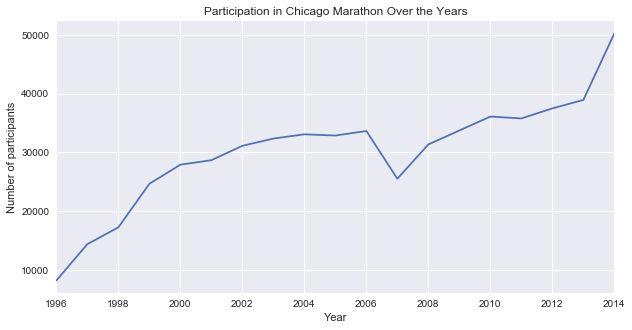

In [12]:
plt.figure(figsize=(10,5))
data.groupby('Year')['BIB'].count().plot(kind='line')
plt.title('Participation in Chicago Marathon Over the Years')
plt.ylabel('Number of participants')

### Trend of Participation in Chicaog Marathon by each country over the years
- Next steps:
    - add a plotly world map that shows the number participants from 1996-Present

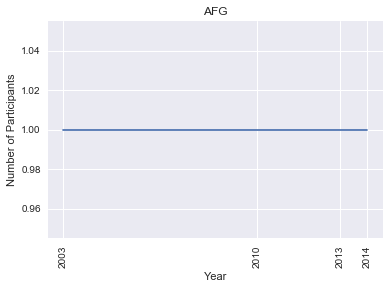

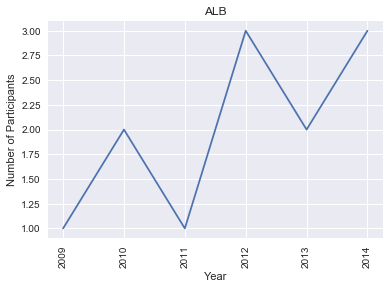

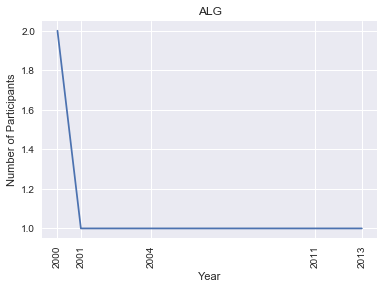

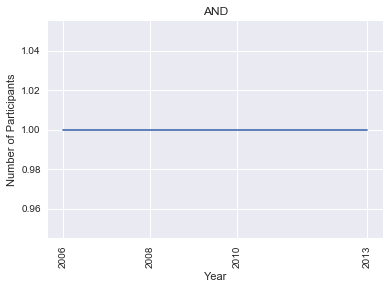

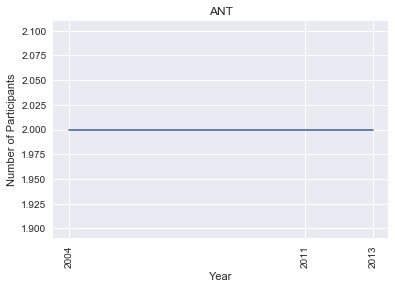

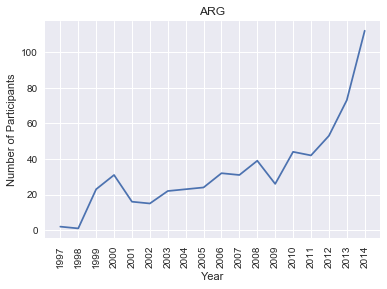

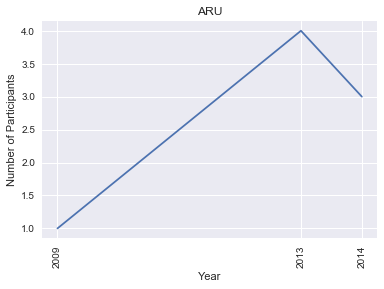

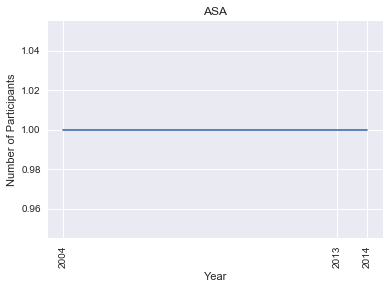

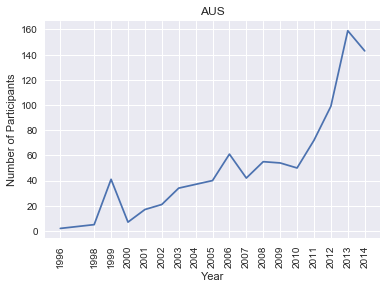

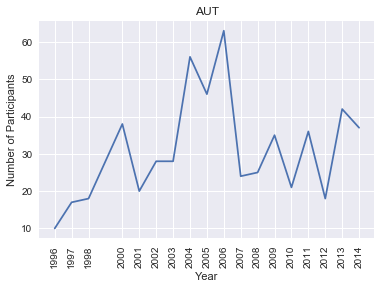

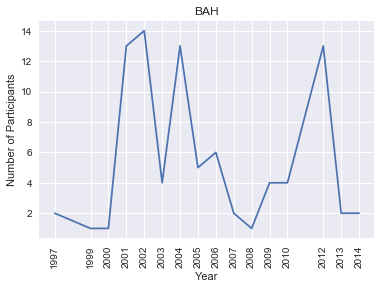

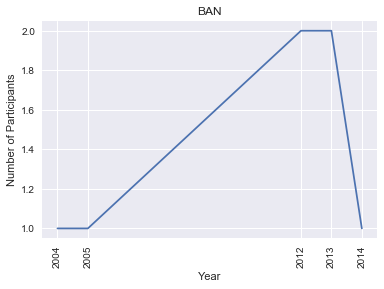

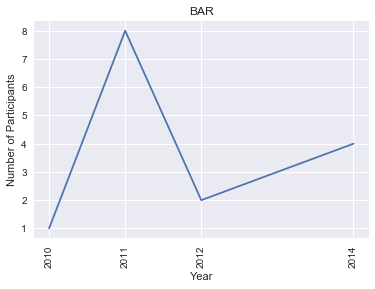

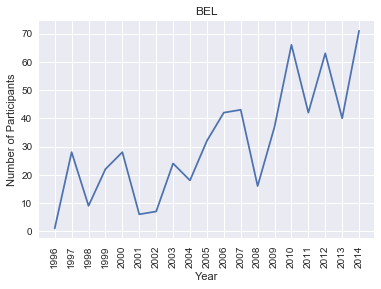

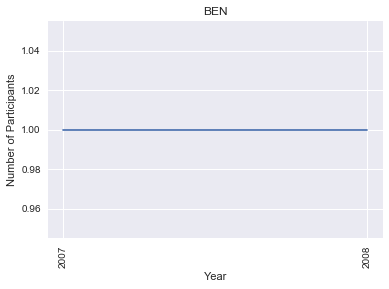

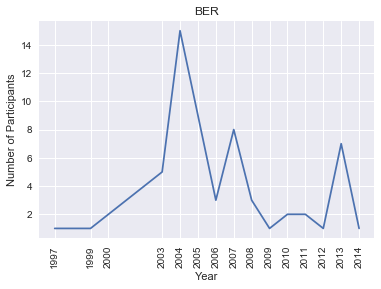

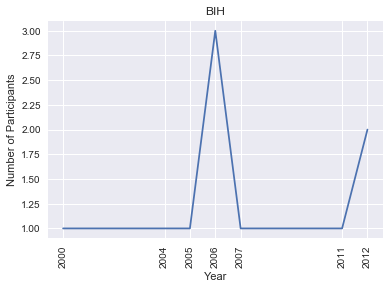

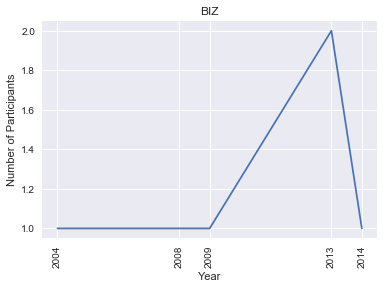

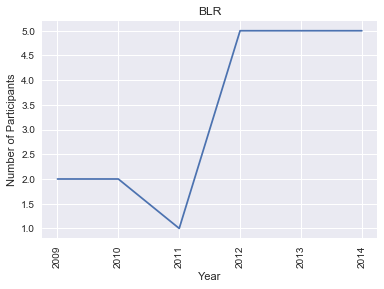

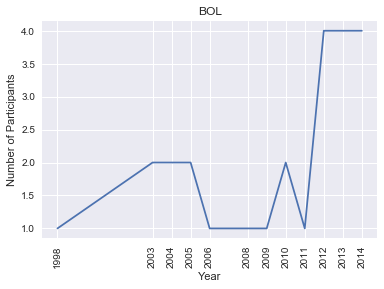

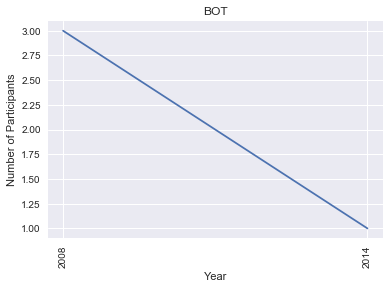

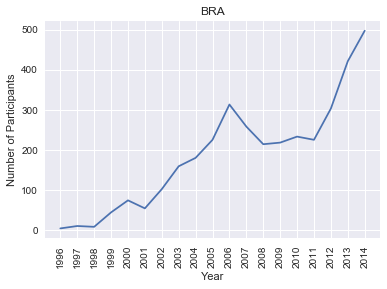

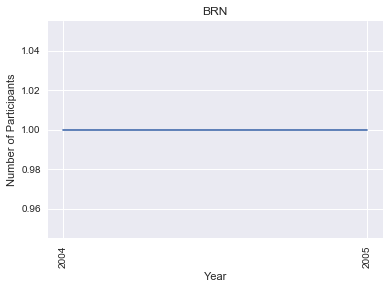

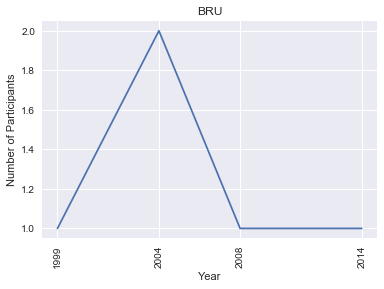

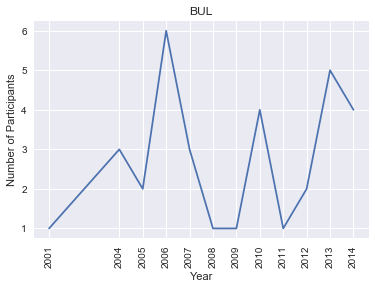

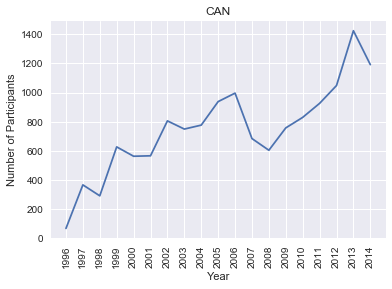

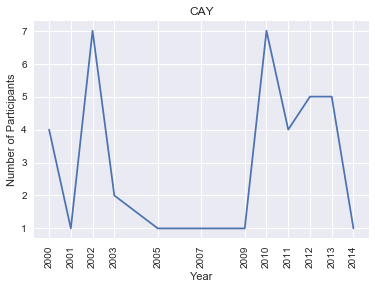

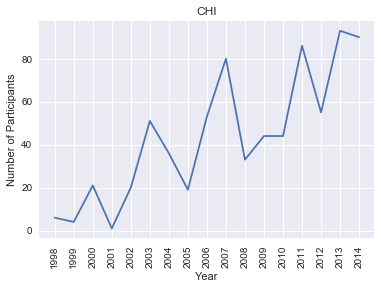

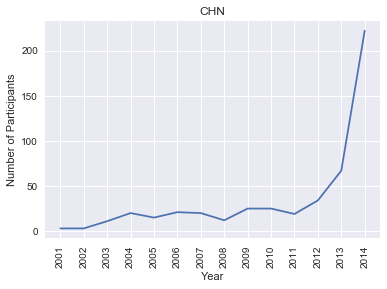

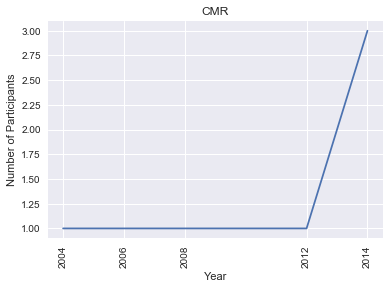

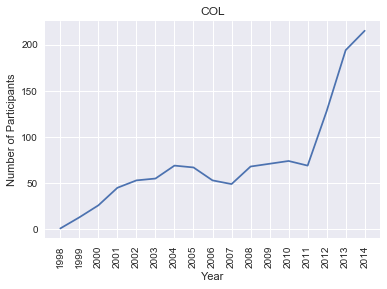

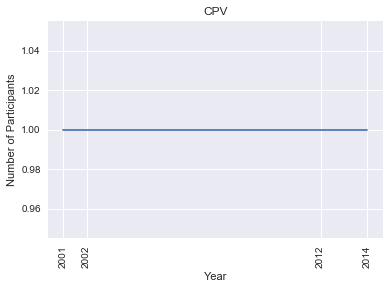

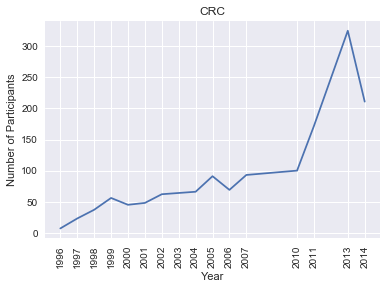

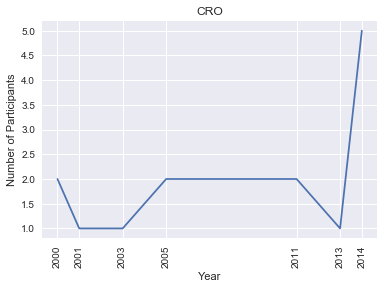

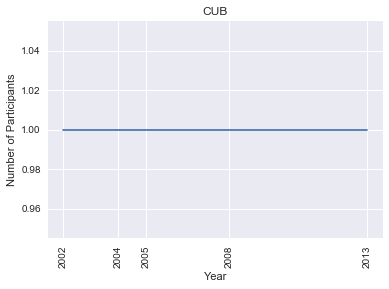

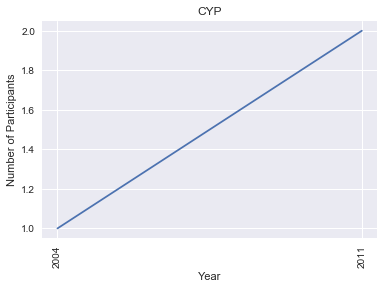

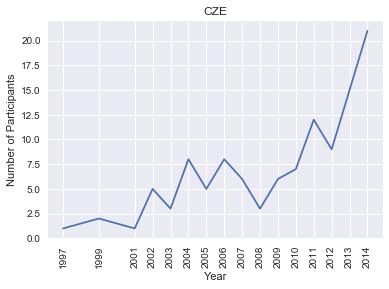

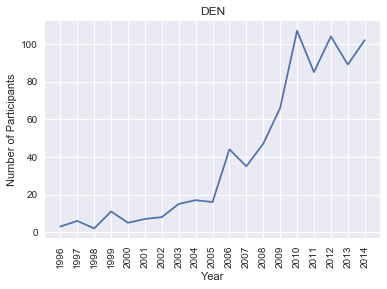

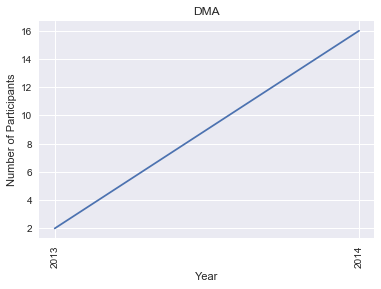

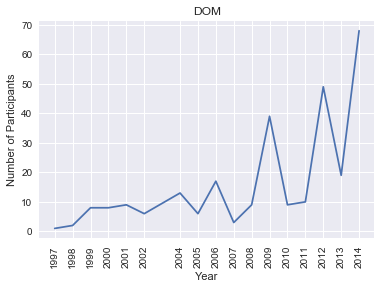

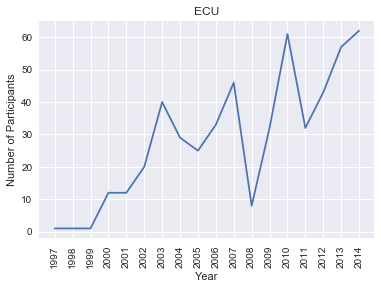

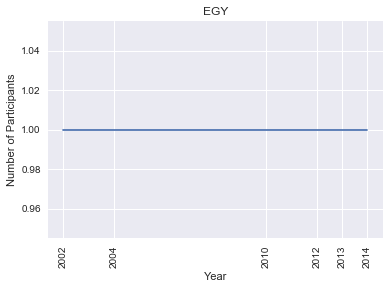

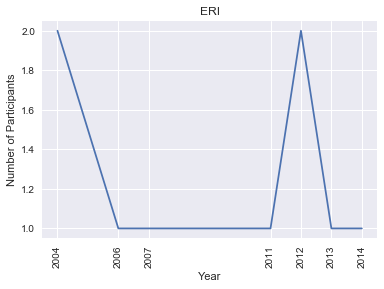

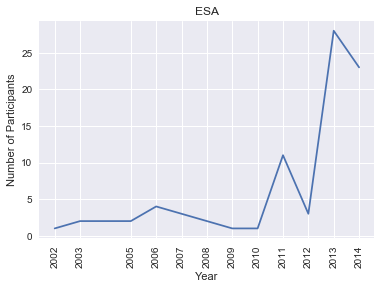

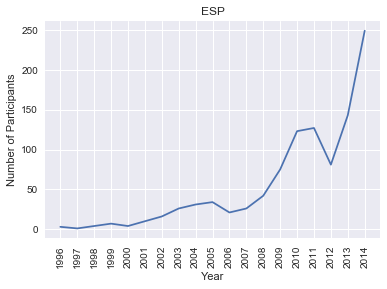

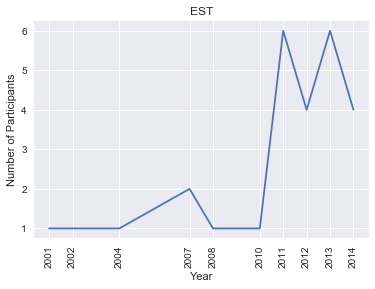

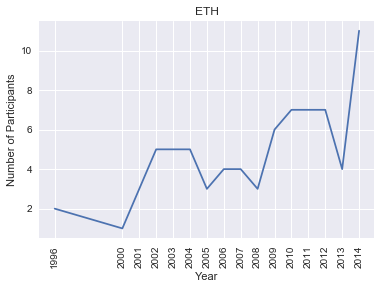

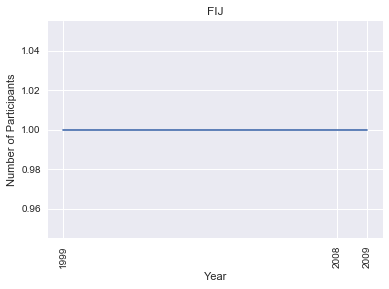

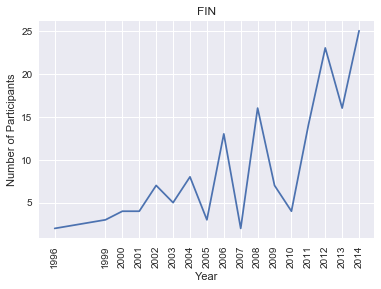

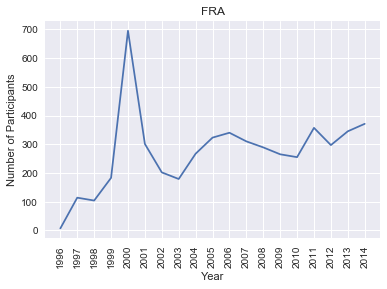

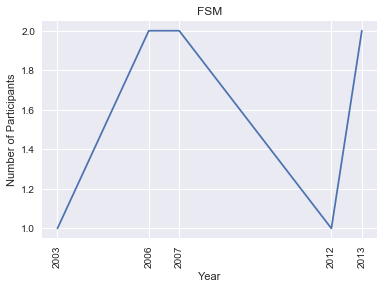

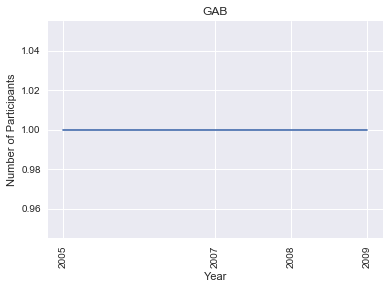

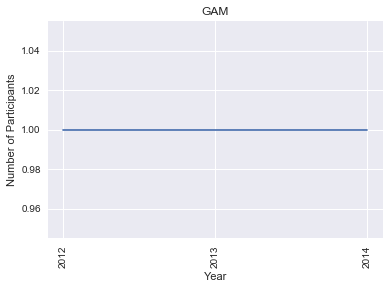

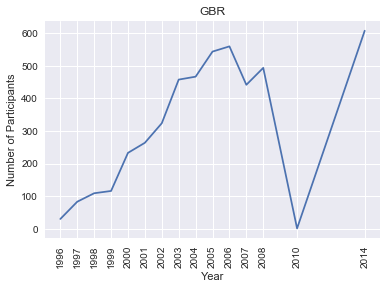

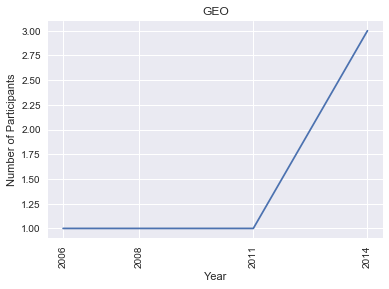

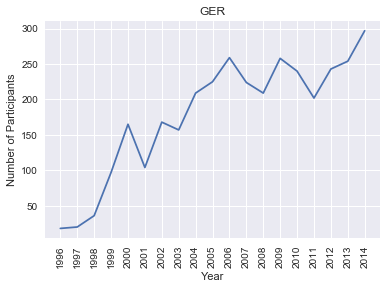

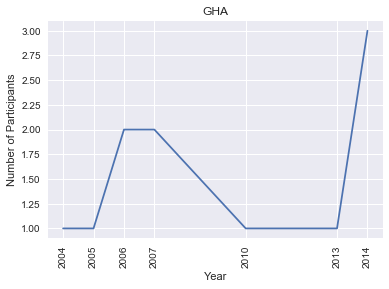

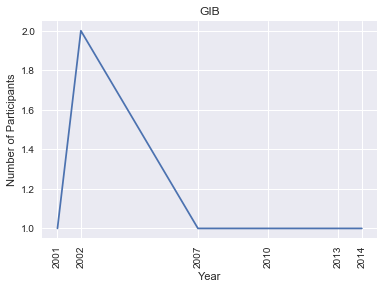

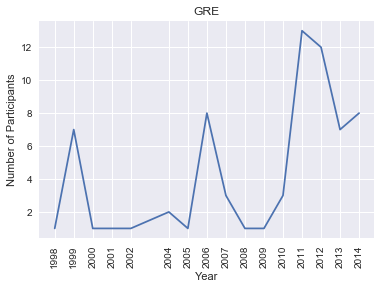

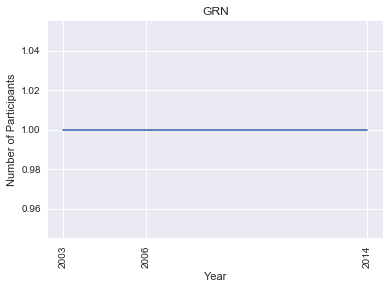

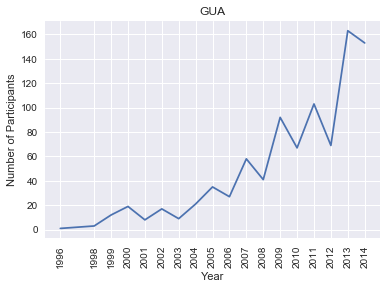

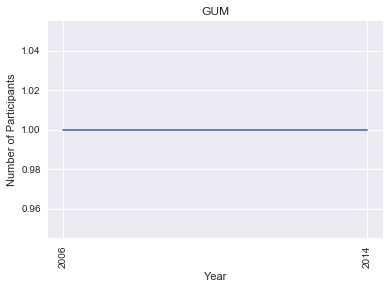

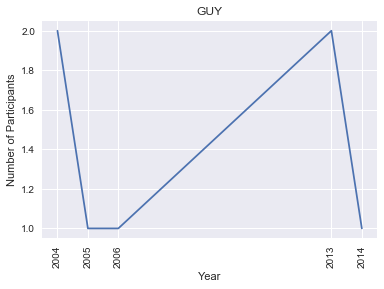

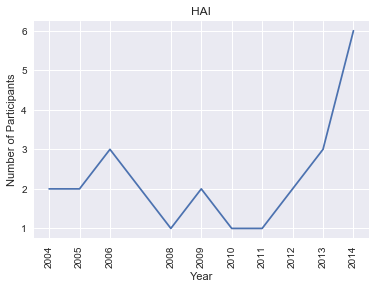

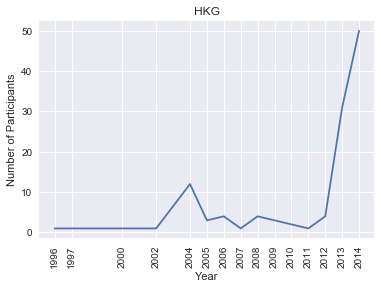

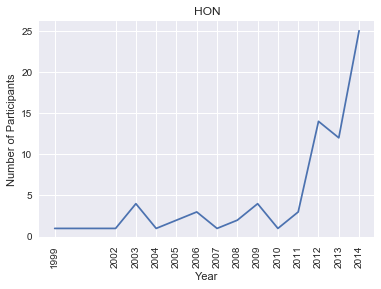

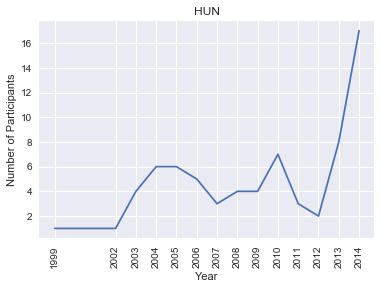

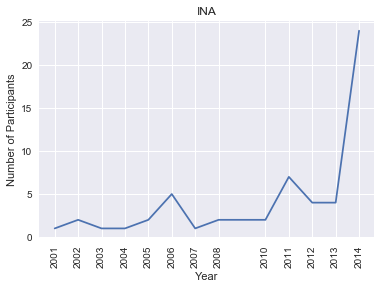

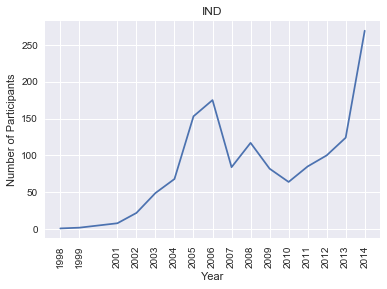

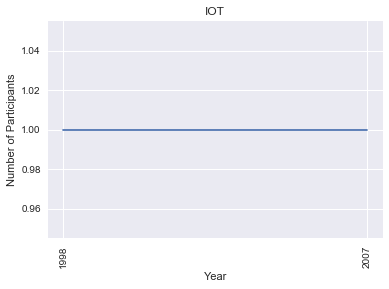

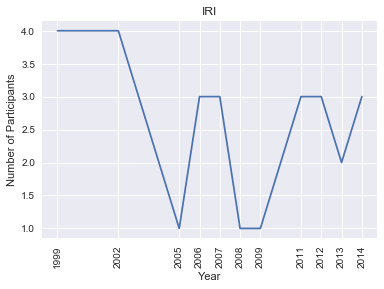

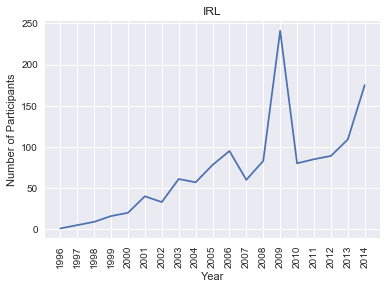

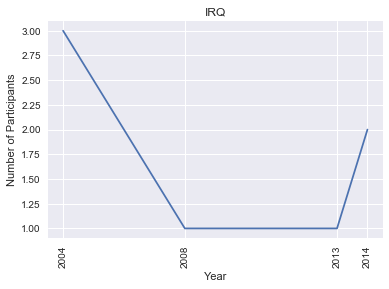

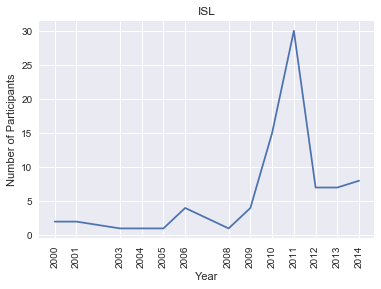

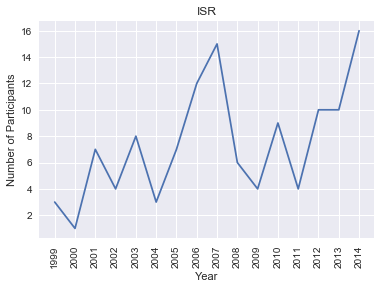

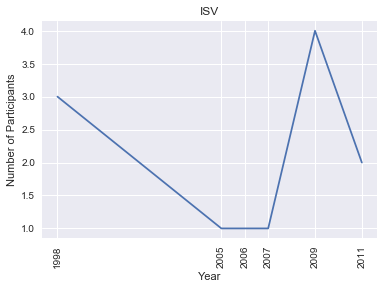

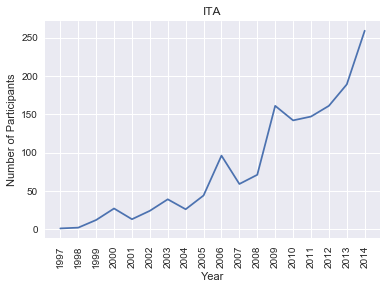

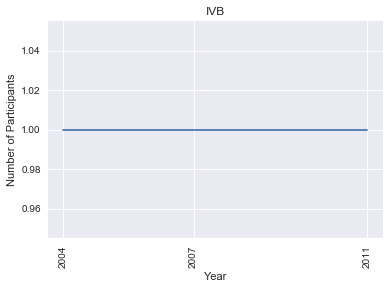

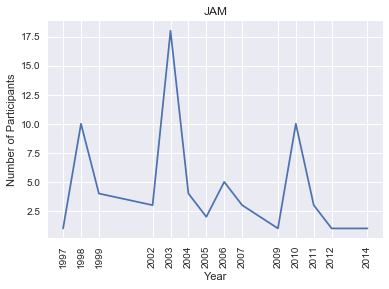

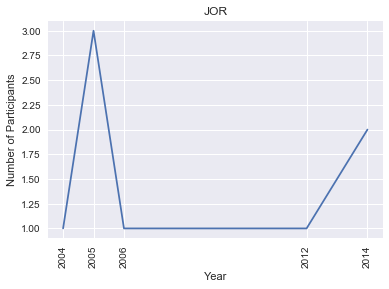

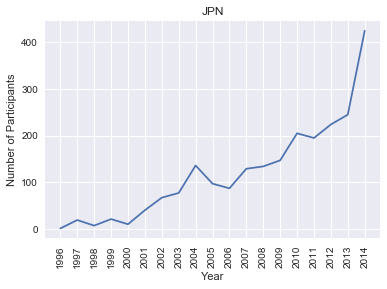

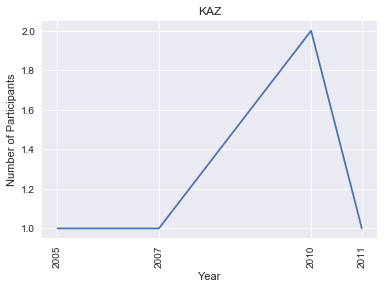

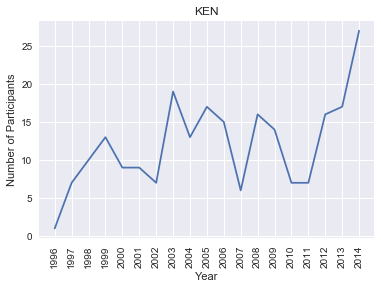

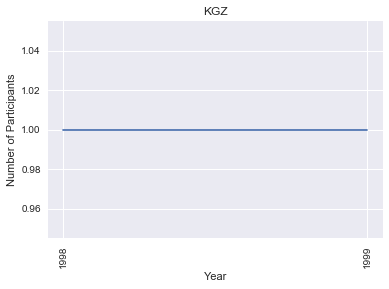

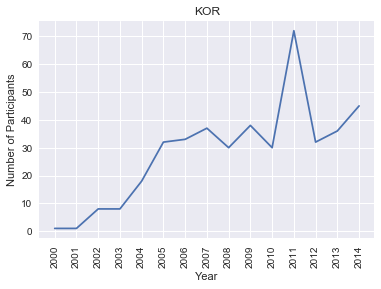

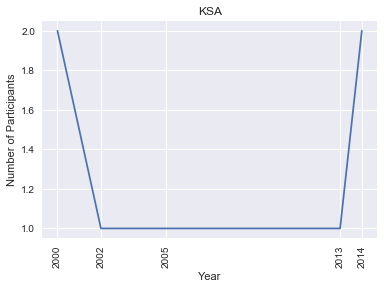

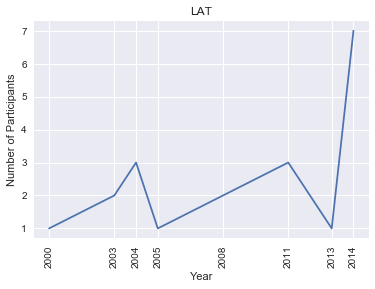

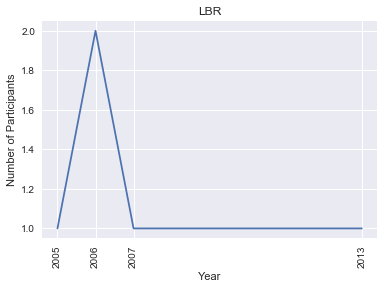

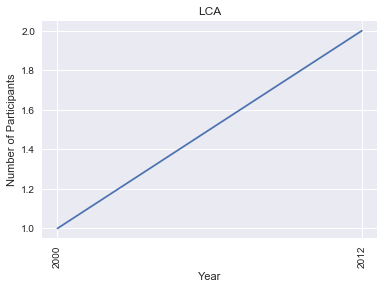

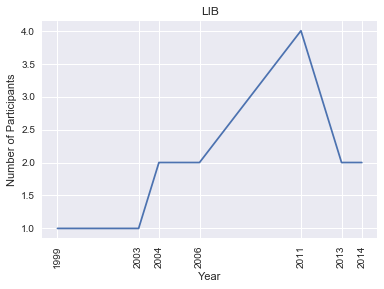

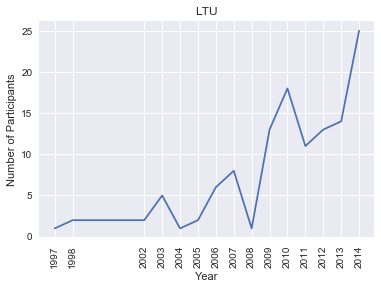

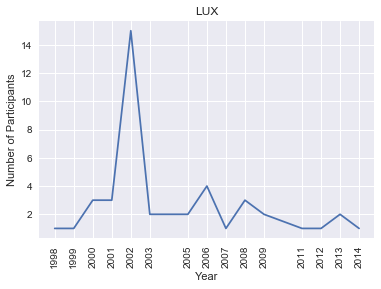

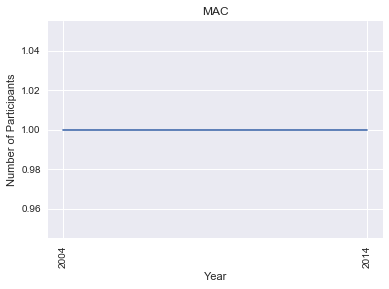

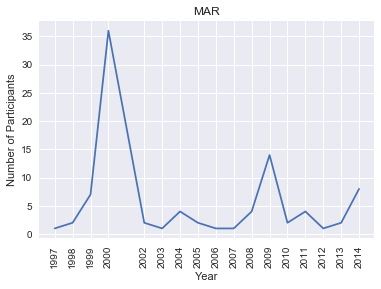

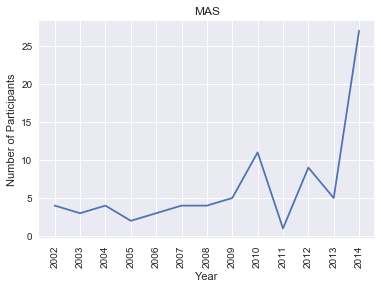

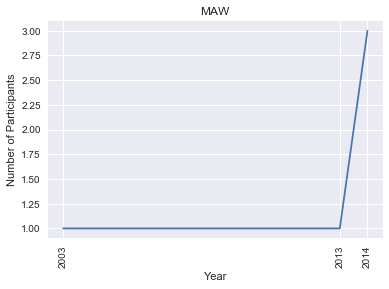

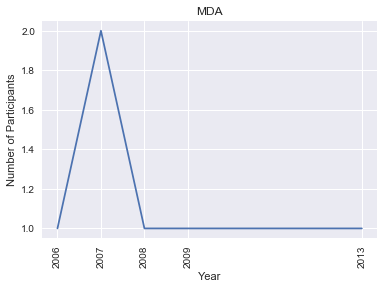

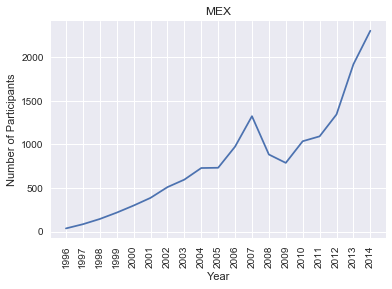

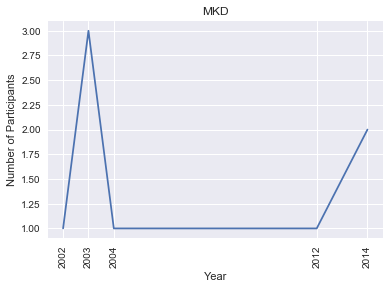

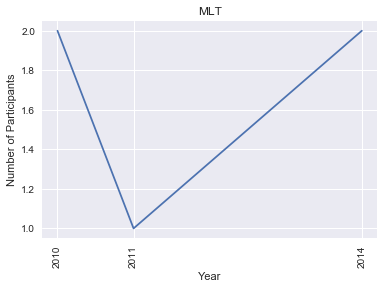

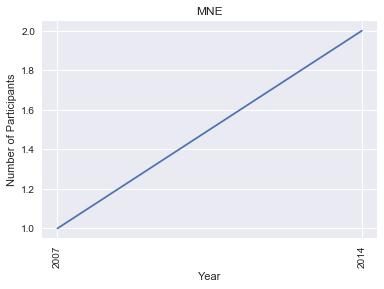

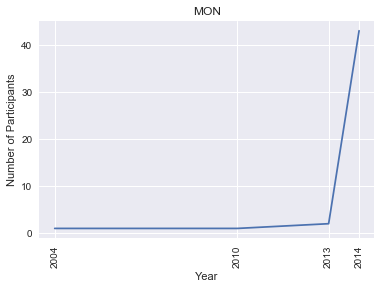

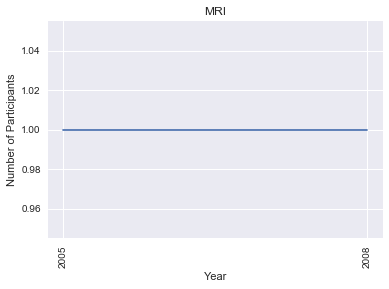

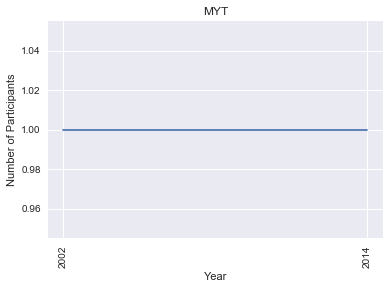

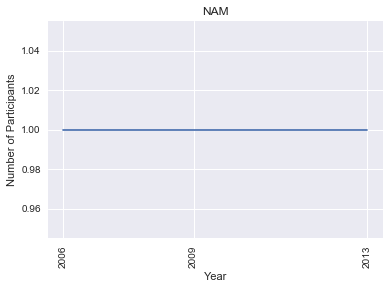

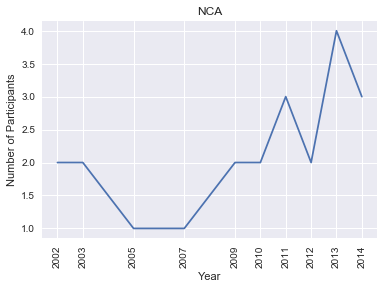

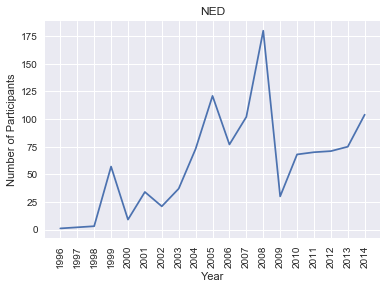

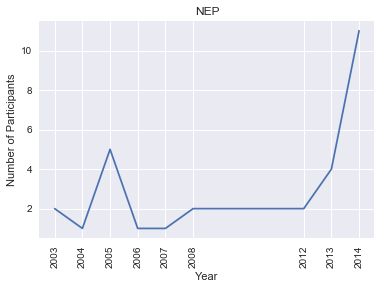

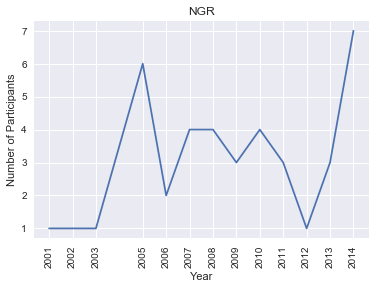

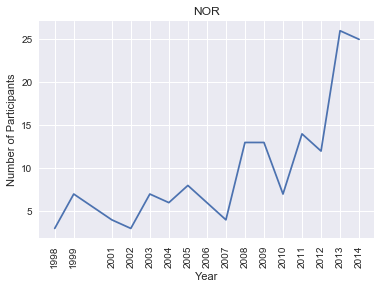

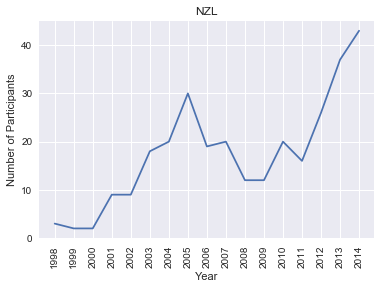

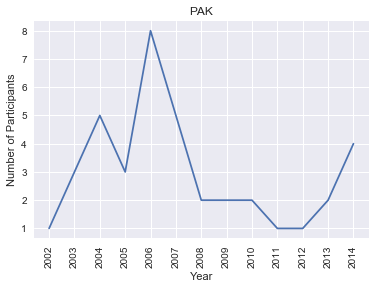

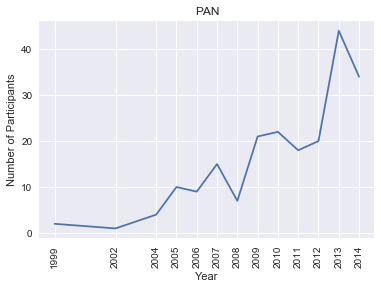

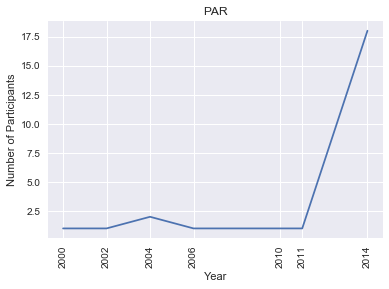

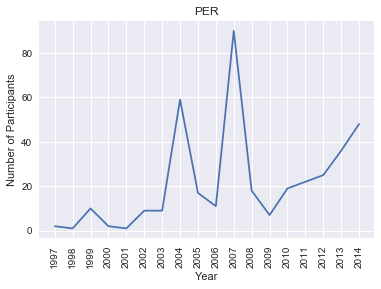

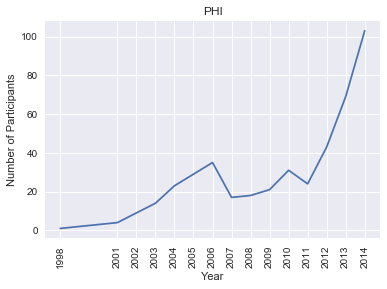

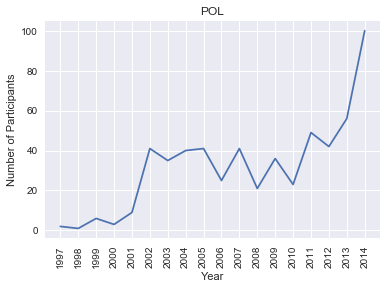

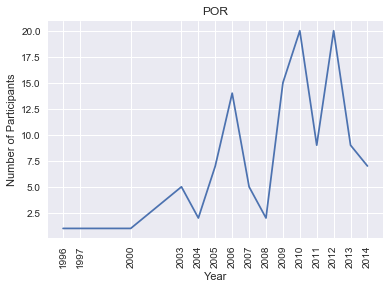

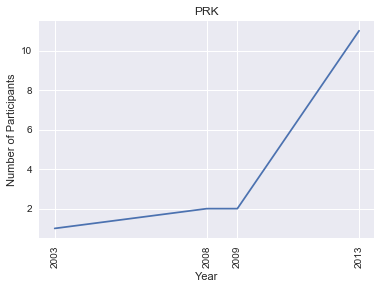

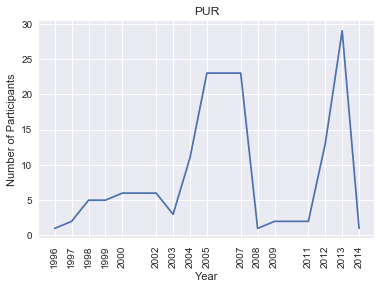

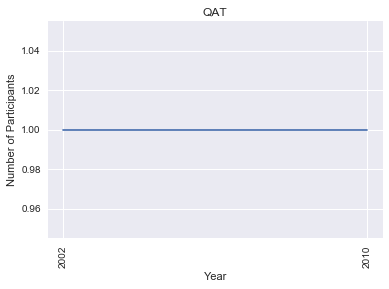

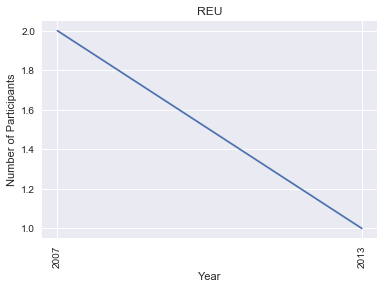

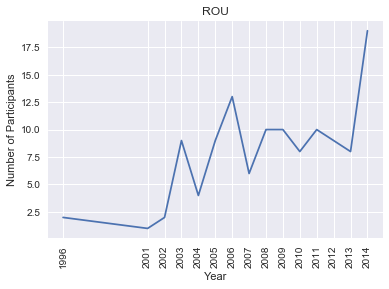

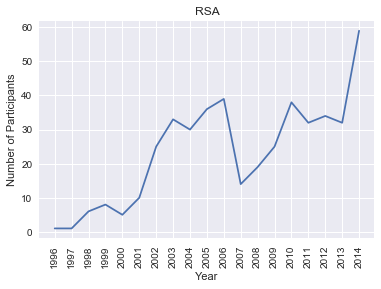

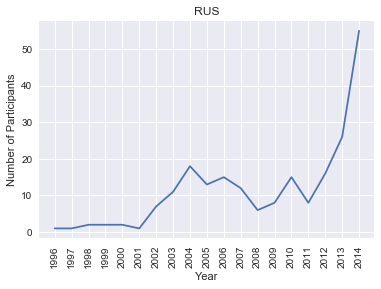

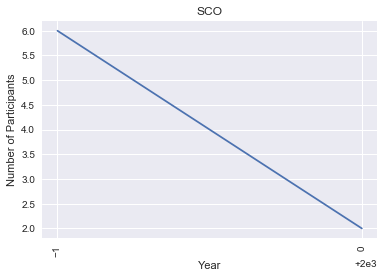

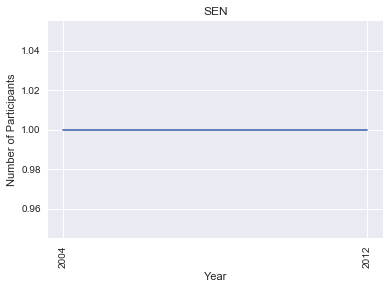

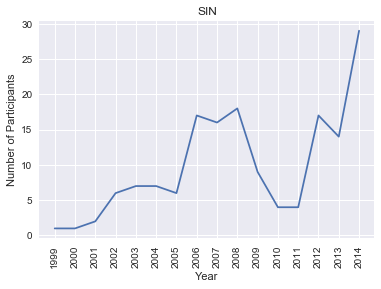

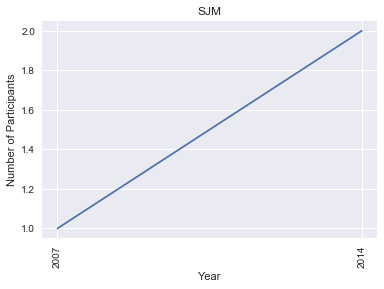

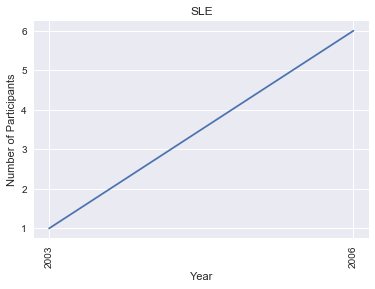

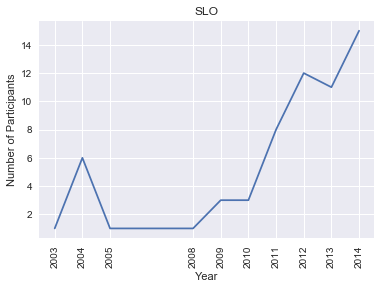

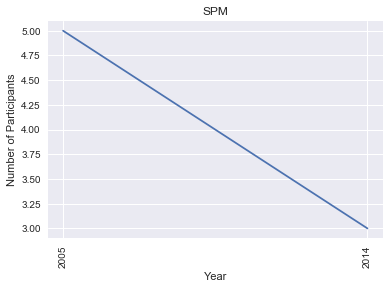

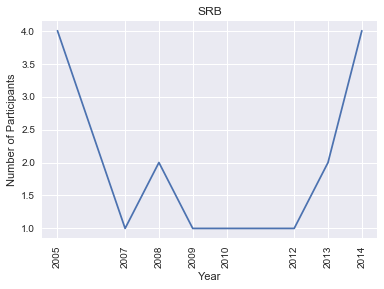

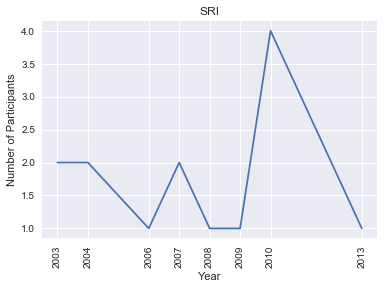

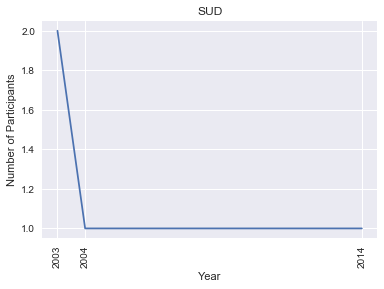

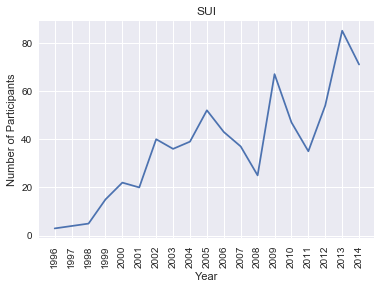

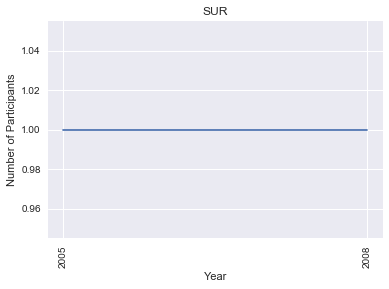

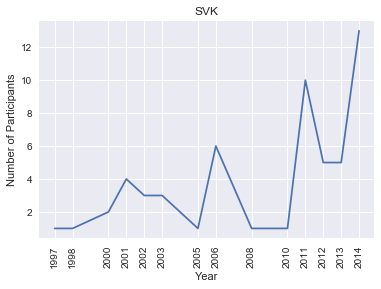

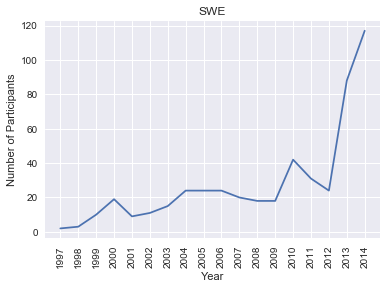

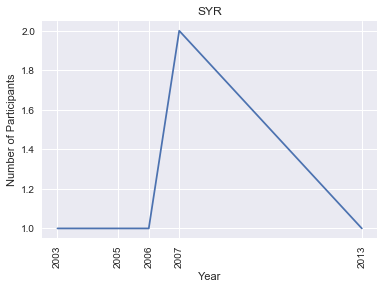

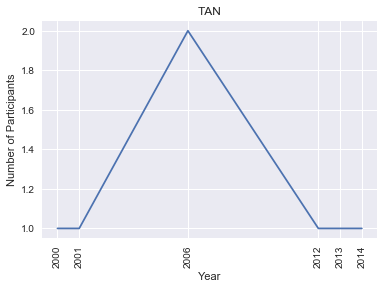

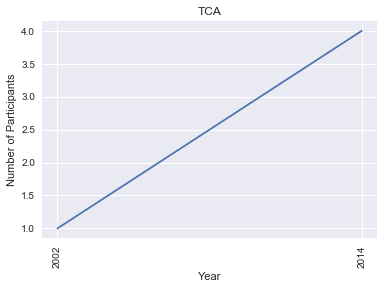

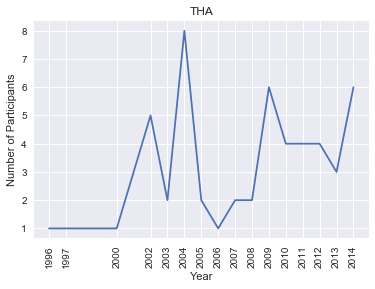

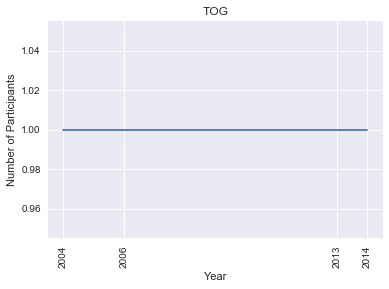

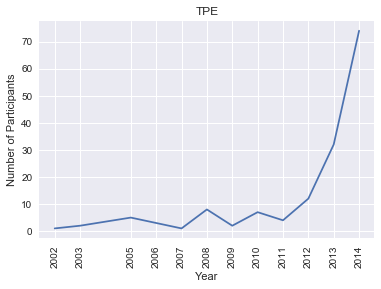

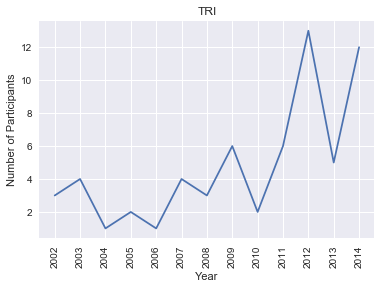

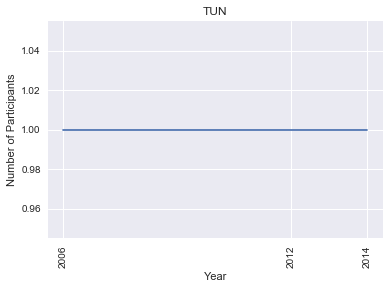

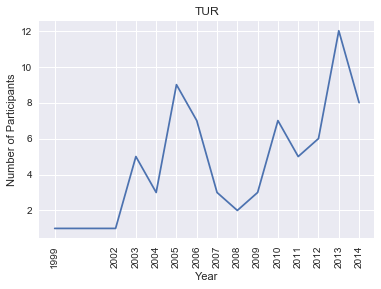

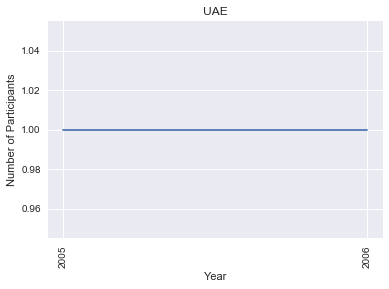

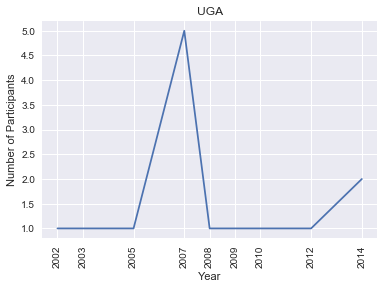

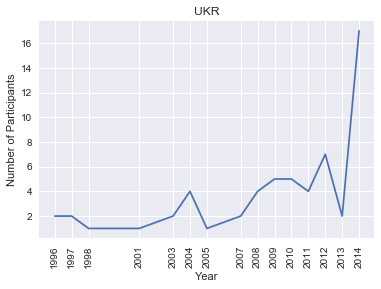

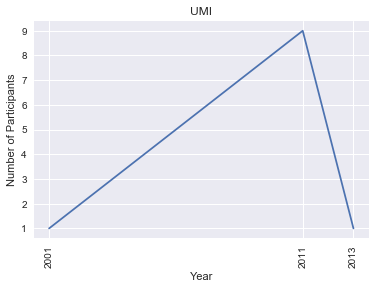

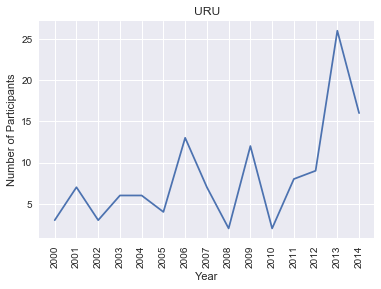

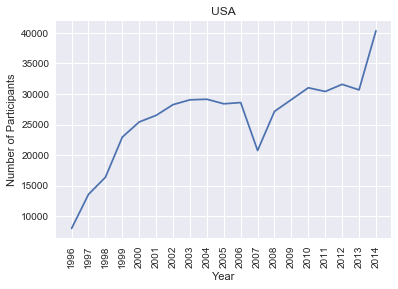

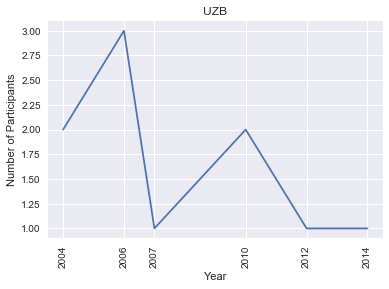

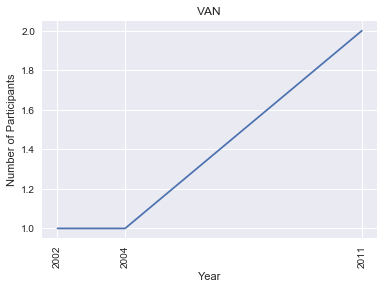

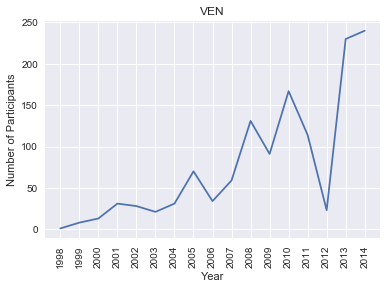

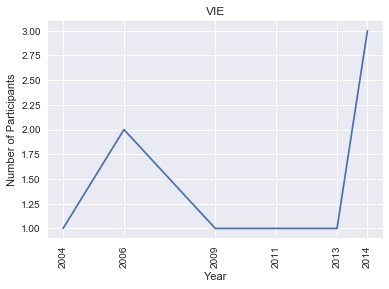

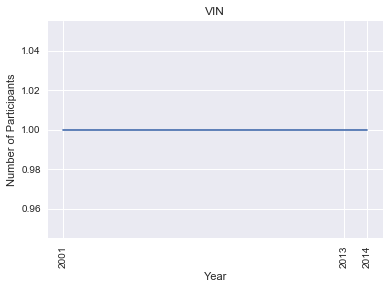

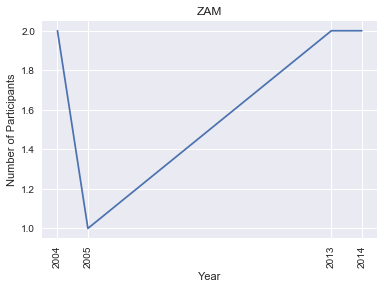

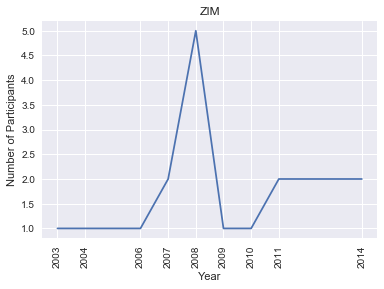

In [13]:
'''
plotting the trend of participation of each country in the Chicago marathon over the years.
If a country participated once (only participated in a single year from 1996-present),
don't plot. Otherwise, plot the trend. 

For example ANG (ANGOLA) participated in a single year only. Which can't be represented in a
trend line other than a single dot. That's why similar records have been excluded.

reference for examples: https://stackoverflow.com/questions/16006572/plotting-different-colors-in-matplotlib
'''
fig, ax = plt.subplots()
participation_by_country = pd.DataFrame(data.groupby(['Nationality','Year'])['BIB'].count()).reset_index()
for n in participation_by_country['Nationality'].unique().tolist():
        if(n): #empty strings are treated as False in boolean. Accordingly, run the following lines of code if string n is not empty
            country_record = participation_by_country[participation_by_country['Nationality']==n][['Year','BIB']]
            #for countries that participated in the marathon for at least 2 years..do the following
            if(len(country_record['Year'])>1): 
                plt.plot(country_record['Year'],country_record['BIB'])
                plt.xticks(country_record['Year'],rotation='vertical')
                plt.title(n)
                plt.xlabel('Year')
                plt.ylabel('Number of Participants')
                plt.show()

In [14]:
'''
# Visualizing results in a plotly pie chart

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
plt.figure(figsize=(80,80))
init_notebook_mode(connected=True)

participation_by_country = pd.DataFrame(data.groupby(['Nationality'])['BIB'].count()).reset_index()
participation_by_country = participation_by_country[(participation_by_country['Nationality']!='')
                                                    &(participation_by_country['Nationality']!='USA')]
#participation_by_country.to_csv('non-US-participants.csv') uncomment to get the number of non-US participants in the marathon 
labels = participation_by_country['Nationality']
values = participation_by_country['BIB']
trace=go.Pie(labels=labels,values=values)
iplot([trace])

'''

"\n# Visualizing results in a plotly pie chart\n\nfrom plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot\nimport plotly.graph_objs as go\nplt.figure(figsize=(80,80))\ninit_notebook_mode(connected=True)\n\nparticipation_by_country = pd.DataFrame(data.groupby(['Nationality'])['BIB'].count()).reset_index()\nparticipation_by_country = participation_by_country[(participation_by_country['Nationality']!='')\n                                                    &(participation_by_country['Nationality']!='USA')]\n#participation_by_country.to_csv('non-US-participants.csv') uncomment to get the number of non-US participants in the marathon \nlabels = participation_by_country['Nationality']\nvalues = participation_by_country['BIB']\ntrace=go.Pie(labels=labels,values=values)\niplot([trace])\n\n"

## Number of participants by State

In [15]:
data.head(3)

,Age,BIB,City_State,Division,Finish,Half,Name,Place_Division,Place_Gender,Place_Overall,Year,First_Name,Last_Name,City,State,Nationality
0,NaN,NaN,NaN,25-29,04:56:52,,»,647,2283,8110,1996,,,,,
1,NaN,5666.0,"USA, IL",25-29,05:37:37,,"» Aaron, Todd (USA)",1144,6290,9003,1996,Todd,Aaron,USA,IL,USA
2,NaN,5354.0,"USA, IL",30-34,05:16:57,,"» Abbinanti, Sal (USA)",1183,6130,8665,1996,Sal,Abbinanti,USA,IL,USA


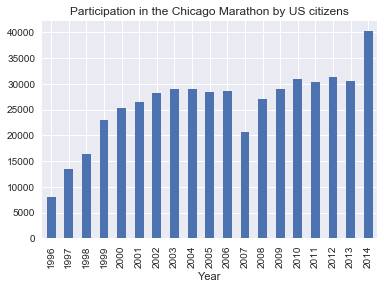

In [16]:
participation_by_state = data[(data['Nationality']=='USA') & (data['State']!='')]
participation_by_state.groupby(['Year'])['BIB'].count().plot('bar')
plt.title('Participation in the Chicago Marathon by US citizens')

### Are participants getting faster?

In [17]:
finish_time = data[['Year','Finish']]
finish_time.head(5)

,Year,Finish
0,1996,04:56:52
1,1996,05:37:37
2,1996,05:16:57
3,1996,03:37:00
4,1996,04:13:15


In [18]:
#ignoring '' values. Otherwise the conversion to hours will raise errors as '' has not attribute hour
finish_time['hour'] = finish_time['Finish'].apply(lambda x: x.hour if x!='' else '')

In [19]:
finish_time.head(3)

,Year,Finish,hour
0,1996,04:56:52,4
1,1996,05:37:37,5
2,1996,05:16:57,5


In [20]:
finish_time[finish_time['Year']==1996]['hour'].value_counts()

4    3707
3    3339
5     774
2     321
6      70
1       4
0       1
Name: hour, dtype: int64

In [21]:
finish_time[(finish_time['Year']==1996) & (finish_time['hour']!='')]['hour'].value_counts().sort_index()

0       1
1       4
2     321
3    3339
4    3707
5     774
6      70
Name: hour, dtype: int64

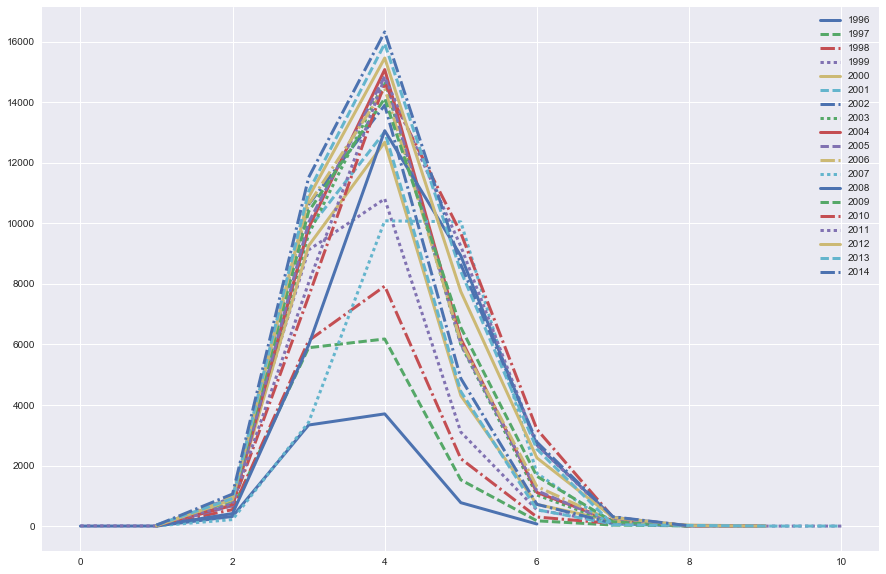

In [22]:
from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)
fig, ax = plt.subplots(figsize=(15,10))

for y in finish_time['Year'].unique().tolist():
    if(y!=''):
        time = finish_time[(finish_time['Year']==y) & (finish_time['hour']!='')]['hour'].value_counts().sort_index().index.tolist()
        count = finish_time[(finish_time['Year']==y) & (finish_time['hour']!='')]['hour'].value_counts().sort_index().values.tolist()
        ax.plot(time,count,next(linecycler),linewidth=3)

plt.legend(finish_time['Year'].unique().tolist())
plt.legend()
plt.show()    
    

# To be continued ...